In [1]:
#Import dependencies
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [2]:
#Load the data from the CSV using The Data Frame
data = pd.read_csv("/content/drive/MyDrive/Maternal Health Risk Prediction(GSSOC'24)/Maternal Health Risk Data Set.csv")

In [3]:
#Print the first five rows from this dataset
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [5]:
# To show any null or nan values in this data frame
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [6]:
#To show any duplicate value in this data Fram
data.duplicated().sum()

562

In [7]:
#Duplicated value
data.duplicated().any()

True

In [8]:
#To drop duplicate values in this data frame
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().any()

False

In [10]:
data.shape

(452, 7)

In [11]:
# Numbers of unique values
data["Age"].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46])

In [12]:
data["SystolicBP"].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78])

In [13]:
data["DiastolicBP"].unique()

array([ 80,  90,  70,  85,  60,  89,  75, 100,  50,  65,  95,  49,  63,
        69,  76,  68])

In [14]:
data["BS"].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

In [15]:
data["BodyTemp"].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [16]:
data["HeartRate"].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7])

In [17]:
data["RiskLevel"].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [18]:
ca_val = [column for column in data.columns if data[column].nunique() <= 10]

In [19]:
#Categorical Data
ca_val

['BodyTemp', 'RiskLevel']

In [20]:
co_val = [column for column in data.columns if data[column].nunique() > 10]

In [21]:
co_val

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

In [22]:
data["BodyTemp"].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [23]:
data["RiskLevel"].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [24]:
co_val

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

In [25]:
data["Age"].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46])

In [26]:
# Maping
risklevel = {"low risk" : 1,
            "mid risk" : 2,
            "high risk" : 3}

# Apply Using Map
data["RiskLevel"] = data["RiskLevel"].map(risklevel).astype(float)
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,2.0
674,15,100,60,6.0,98.0,80,1.0
703,15,100,49,7.6,98.0,77,1.0
704,12,100,50,6.0,98.0,70,2.0


In [27]:
data["RiskLevel"].value_counts()

RiskLevel
1.0    234
3.0    112
2.0    106
Name: count, dtype: int64

In [28]:
# the describe() function as a way to get a quick summary of your data.
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115,1.730088
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973,0.833169
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,1.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000,1.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,3.000000


In [29]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [30]:
data[["RiskLevel", "Age"]].corr()

,RiskLevel,Age
RiskLevel,1.00000,0.18301
Age,0.18301,1.00000


In [31]:
data[["RiskLevel","SystolicBP"]].corr()

,RiskLevel,SystolicBP
RiskLevel,1.000000,0.327365
SystolicBP,0.327365,1.000000


In [32]:
data[["RiskLevel","DiastolicBP"]].corr()

,RiskLevel,DiastolicBP
RiskLevel,1.000000,0.254239
DiastolicBP,0.254239,1.000000


In [33]:
data[["RiskLevel","BodyTemp"]].corr()

,RiskLevel,BodyTemp
RiskLevel,1.000000,0.259701
BodyTemp,0.259701,1.000000


In [34]:
data[["RiskLevel","BS"]].corr() # 1st

,RiskLevel,BS
RiskLevel,1.000000,0.548888
BS,0.548888,1.000000


In [35]:
data[["RiskLevel","BodyTemp"]].corr()

,RiskLevel,BodyTemp
RiskLevel,1.000000,0.259701
BodyTemp,0.259701,1.000000


In [36]:
data[["RiskLevel","HeartRate"]].corr()

,RiskLevel,HeartRate
RiskLevel,1.000000,0.183289
HeartRate,0.183289,1.000000


In [37]:
data[["RiskLevel","RiskLevel"]].corr()


,RiskLevel,RiskLevel
RiskLevel,1.0,1.0
RiskLevel,1.0,1.0


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use("fivethirtyeight")

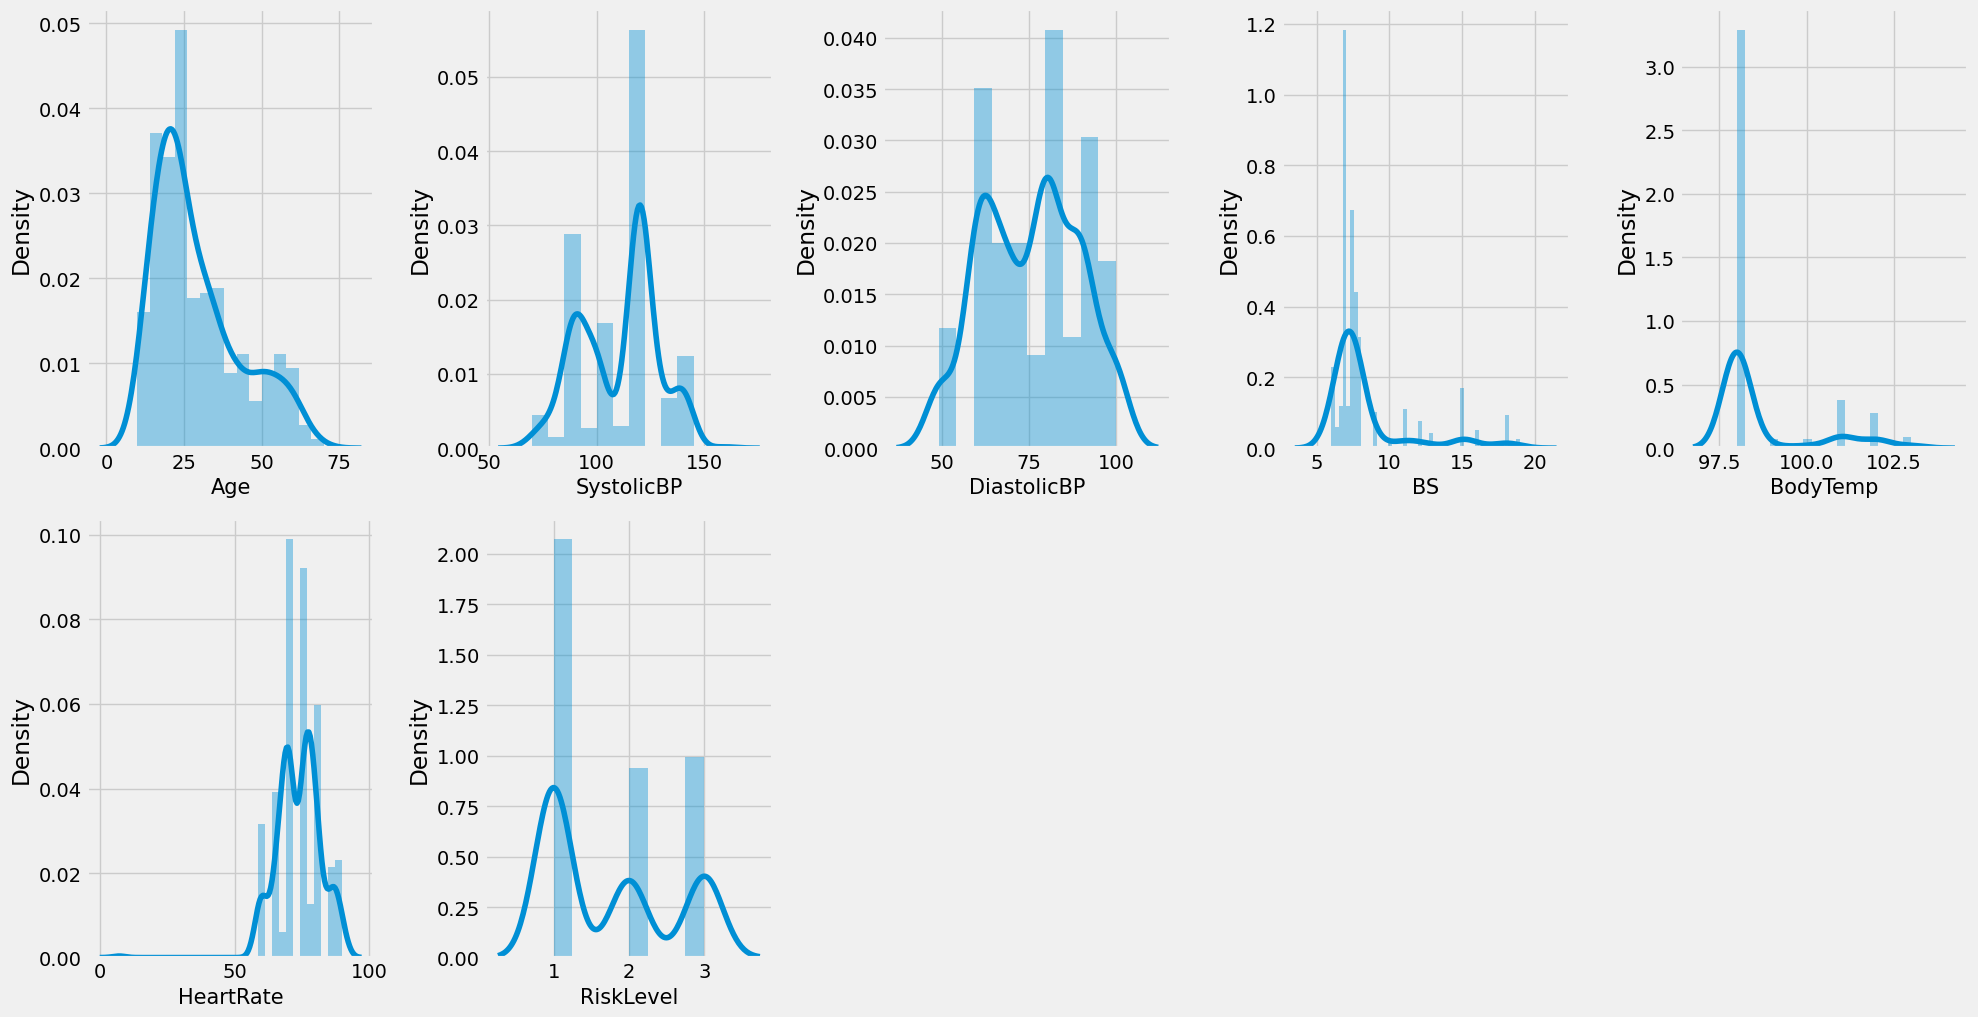

In [40]:
#data distribution for every column
plt.figure(figsize = (20,15))
plotnumber = 1

for column in data:
    if plotnumber <= 7:

        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)

    plotnumber += 1

plt.tight_layout()
plt.show()

Overview

In [41]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [42]:
#column summary

column_summary = {}

# Approximate Distinct Count
column_summary['Approximate Distinct Count'] = data["Age"].nunique()

# Approximate Unique (%)
approx_unique_percentage = (column_summary['Approximate Distinct Count'] / len(data["Age"])) * 100
column_summary['Approximate Unique (%)'] = f"{approx_unique_percentage:.1f}%"

# Missing Values
column_summary["Missing"] = data["Age"].isnull().sum()

# Missing (%)
missing_percentage = (column_summary['Missing'] / len(data["Age"])) * 100
column_summary['Missing (%)'] = f"{missing_percentage:.1f}%"

# Infinite Values (if applicable)
column_summary["Infinite"] = data["Age"].isin([float("inf"),float("-inf")]).sum()

# Infinite (%)
infinite_percentage = (column_summary['Infinite'] / len(data["Age"])) * 100
column_summary['Infinite (%)'] = f"{infinite_percentage:.1f}%"

# Memory Size (assuming column is a Series)
column_summary['Memory Size'] = data['Age'].memory_usage(deep=True) / 1024  # in KB

# Mean
column_summary['Mean'] = data["Age"].mean()

# Minimum
column_summary['Minimum'] = data["Age"].min()

# Maximum
column_summary['Maximum'] = data["Age"].max()

# Zeros
column_summary['Zeros'] = (data["Age"] == 0).sum()

# Zeros (%)
zeros_percentage = (column_summary['Zeros'] / len(data["Age"])) * 100
column_summary['Zeros (%)'] = f"{zeros_percentage:.1f}%"

# Negatives (if applicable)
column_summary['Negatives'] = (data["Age"] < 0).sum()

# Negatives (%)
negatives_percentage = (column_summary['Negatives'] / len(data["Age"])) * 100
column_summary['Negatives (%)'] = f"{negatives_percentage:.1f}%"



# Display the summary
for key, value in column_summary.items():
    print(f"{key}\t{value}")

Approximate Distinct Count	50
Approximate Unique (%)	11.1%
Missing	0
Missing (%)	0.0%
Infinite	0
Infinite (%)	0.0%
Memory Size	7.0625
Mean	29.194690265486727
Minimum	10
Maximum	70
Zeros	0
Zeros (%)	0.0%
Negatives	0
Negatives (%)	0.0%


Descriptive Statictics

In [43]:
from scipy.stats import skew, kurtosis

In [44]:
#Assuming we have an "Age" column in this data set stored in a numpy array called "df"

df = np.array(data["Age"])

# Calculate Mean
mean = np.mean(df)

# Calculate Standard Deviation
std_dev = np.std(df)

# Calculate Variance
variance = np.var(df)

# Calculate Sum
total_sum = np.sum(df)

# Calculate Skewness
skewness = skew(df)

# Calculate Kurtosis
kurt = kurtosis(df)

# Calculate Coefficient of Variation
coef_variation = std_dev / mean

# Print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Variance:", variance)
print("Sum:", total_sum)
print("Skewness:", skewness)
print("Kurtosis:", kurt)
print("Coefficient of Variation:", coef_variation)

Mean: 29.194690265486727
Standard Deviation: 13.752141205496798
Variance: 189.12138773592295
Sum: 13196
Skewness: 0.9190166099923903
Kurtosis: -0.10194052893537409
Coefficient of Variation: 0.4710493956414484


Quantile Statictics

In [45]:
#Assuming we have an "Age" column in this data set stored in a numpy array called "df"

df = np.array(data["Age"])

# Calculate Minimum
minimum = np.min(df)

# Calculate 5th Percentile
percentile_5 = np.percentile(df, 5)

# Calculate Q1 (First Quartile)
q1 = np.percentile(df, 25)

# Calculate Median
median = np.median(df)

# Calculate Q3 (Third Quartile)
q3 = np.percentile(df, 75)

# Calculate 95th Percentile
percentile_95 = np.percentile(df, 95)

# Calculate Maximum
maximum = np.max(df)

# Calculate Range
data_range = maximum - minimum

# Calculate Interquartile Range (IQR)
iqr = q3 - q1

# Print the results
print("Minimum:", minimum)
print("5th Percentile:", percentile_5)
print("Q1 (First Quartile):", q1)
print("Median:", median)
print("Q3 (Third Quartile):", q3)
print("95th Percentile:", percentile_95)
print("Maximum:", maximum)
print("Range:", data_range)
print("IQR (Interquartile Range):", iqr)

Minimum: 10
5th Percentile: 12.0
Q1 (First Quartile): 19.0
Median: 25.0
Q3 (Third Quartile): 35.0
95th Percentile: 59.44999999999999
Maximum: 70
Range: 60
IQR (Interquartile Range): 16.0


Overview of risk level

In [46]:
# RiskLevel Column

column_summary = {}

# Approximate Distinct Count
column_summary['Approximate Distinct Count'] = data["RiskLevel"].nunique()

# Approximate Unique (%)
approx_unique_percentage = (column_summary['Approximate Distinct Count'] / len(data["RiskLevel"])) * 100
column_summary['Approximate Unique (%)'] = f"{approx_unique_percentage:.1f}%"

# Missing Values
column_summary["Missing"] = data["RiskLevel"].isnull().sum()

# Missing (%)
missing_percentage = (column_summary['Missing'] / len(data["RiskLevel"])) * 100
column_summary['Missing (%)'] = f"{missing_percentage:.1f}%"

# Memory Size (assuming column is a Series)
column_summary['Memory Size'] = data['RiskLevel'].memory_usage(deep=True) / 1024  # in KB


# Display the summary
for key, value in column_summary.items():
    print(f"{key}\t{value}")

Approximate Distinct Count	3
Approximate Unique (%)	0.7%
Missing	0
Missing (%)	0.0%
Memory Size	7.0625


letter

In [47]:
import collections

In [48]:
data1 = pd.read_csv("/content/drive/MyDrive/Maternal Health Risk Prediction(GSSOC'24)/Maternal Health Risk Data Set.csv")

In [49]:
data1.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [50]:
text = data1["RiskLevel"]

# Count occurrences of each character type
count = len(text)
lowercase_count = sum(1 for char in text if char.islower())
uppercase_count = sum(1 for char in text if char.isupper())
space_count = sum(1 for char in text if char.isspace())
dash_count = sum(1 for char in text if char == "-")
decimal_count = sum(1 for char in text if char.isdigit())

# Print the results
print("Count:", count)
print("Lowercase Letter:", lowercase_count)
print("Uppercase Letter:", uppercase_count)
print("Space Separator:", space_count)
print("Dash Punctuation:", dash_count)
print("Decimal Number:", decimal_count)

Count: 1014
Lowercase Letter: 1014
Uppercase Letter: 0
Space Separator: 0
Dash Punctuation: 0
Decimal Number: 0
